Text(0, 0.5, 'Effectiveness')

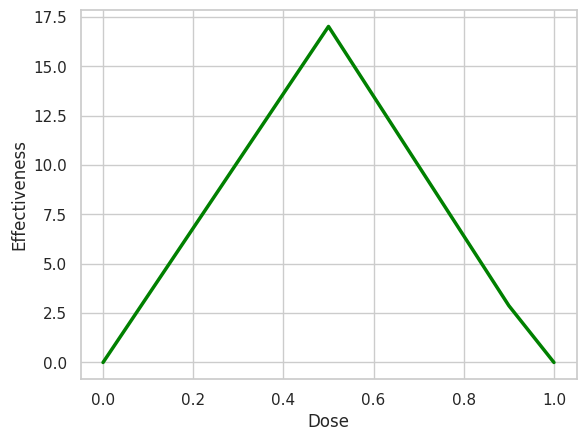

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns


class BasicNN(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # Initialize weight w00
    # requires_grad is for gradient descent, and tells PyTorch which parameter needs optimization
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)

  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    topReluOutput = F.relu(input_to_top_relu)
    scaledTopReluOutput = topReluOutput * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottomReluOutput = F.relu(input_to_bottom_relu)
    scaledBottomReluOutput = bottomReluOutput * self.w11

    inputToFinalRelu = scaledTopReluOutput + scaledBottomReluOutput + self.final_bias

    return F.relu(inputToFinalRelu)


class BasicNN_train(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # Initialize weight w00
    # requires_grad is for gradient descent, and tells PyTorch which parameter needs optimization
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

  def forward(self, input):
    input_to_top_relu = input * self.w00 + self.b00
    topReluOutput = F.relu(input_to_top_relu)
    scaledTopReluOutput = topReluOutput * self.w01

    input_to_bottom_relu = input * self.w10 + self.b10
    bottomReluOutput = F.relu(input_to_bottom_relu)
    scaledBottomReluOutput = bottomReluOutput * self.w11

    inputToFinalRelu = scaledTopReluOutput + scaledBottomReluOutput + self.final_bias

    return F.relu(inputToFinalRelu)



input_doses = torch.linspace(start = 0, end = 1, steps = 11)

model = BasicNN_train()

outputValues = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x = input_doses, y = outputValues.detach(), color='green', linewidth=2.5)

plt.xlabel('Dose')
plt.ylabel('Effectiveness')